In [ ]:
import jax

from fullstream.cls import cls_jax
from fullstream.nn import two_blob_classifier, three_blob_classifier
from fullstream.data import get_three_blobs

/home/phinate/envs/fullstream/lib/python3.7/site-packages/jax-0.1.58-py3.7.egg/jax/lib/xla_bridge.py:119: UserWarning: No GPU/TPU found, falling back to CPU.



Starting training...
Epoch 0 in 3.09 sec
Training set accuracy 0.8476


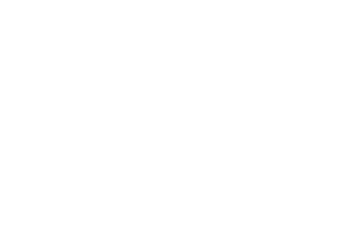

In [ ]:
# x = two_blob_classifier()
x = three_blob_classifier()
_ = x.train(num_epochs=1)
nn_params = x.params

In [ ]:
jax.value_and_grad(cls_jax)(nn_params, test_mu=1.0, transforms=False)

model: Traced<ConcreteArray([ 6.40477037 13.59522963])>with<JVPTrace(level=1/0)>,Traced<ConcreteArray([43.13707402  6.86292598])>with<JVPTrace(level=1/0)>,Traced<ConcreteArray([4.44113382 4.44113382])>with<JVPTrace(level=1/0)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>
model: Traced<ConcreteArray([ 6.40477037 13.59522963])>with<JVPTrace(level=4/0)>,Traced<ConcreteArray([43.13707402  6.86292598])>with<JVPTrace(level=4/0)>,Traced<ConcreteArray([4.44113382 4.44113382])>with<JVPTrace(level=4/0)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>
model: Traced<ShapedArray(float64[2]):J

(DeviceArray(0.42813986, dtype=float64),
 [(DeviceArray([[ 5.1008890e-05,  1.1285765e+00, -2.1200685e-02,
                 -8.4610093e-01,  2.6538056e-01],
                [-1.1010614e-03,  2.3244123e+00, -4.3817598e-02,
                 -1.7552830e+00,  5.4978645e-01]], dtype=float32),
   DeviceArray([-2.2433727e-04,  4.4456789e-01, -8.3645573e-03,
                -3.3513692e-01,  1.0501894e-01], dtype=float32)),
  (),
  (DeviceArray([[-2.1990536e-05,  2.1990536e-05],
                [-4.3094909e-01,  4.3094909e-01],
                [-5.6238137e-02,  5.6238137e-02],
                [-9.4488502e-01,  9.4488502e-01],
                [-8.1819099e-01,  8.1819099e-01]], dtype=float32),
   DeviceArray([-0.27229893,  0.27229893], dtype=float32)),
  ()])

In [ ]:
jax.value_and_grad(cls_jax)(nn_params, test_mu=1.0, transforms=True)

model: Traced<ConcreteArray([ 6.40477037 13.59522963])>with<JVPTrace(level=1/0)>,Traced<ConcreteArray([43.13707402  6.86292598])>with<JVPTrace(level=1/0)>,Traced<ConcreteArray([4.44113382 4.44113382])>with<JVPTrace(level=1/0)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>
model: Traced<ConcreteArray([ 6.40477037 13.59522963])>with<JVPTrace(level=4/0)>,Traced<ConcreteArray([43.13707402  6.86292598])>with<JVPTrace(level=4/0)>,Traced<ConcreteArray([4.44113382 4.44113382])>with<JVPTrace(level=4/0)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/0)>
model: Traced<ShapedArray(float64[2]):J

(DeviceArray(0., dtype=float64),
 [(DeviceArray([[0., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0.]], dtype=float32),
   DeviceArray([0., 0., 0., 0., 0.], dtype=float32)),
  (),
  (DeviceArray([[0., 0.],
                [0., 0.],
                [0., 0.],
                [0., 0.],
                [0., 0.]], dtype=float32),
   DeviceArray([0., 0.], dtype=float32)),
  ()])

## Try to train a nn

### get ploting set up

In [ ]:
from celluloid import Camera
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure()
camera = Camera(fig)

sig, b1, b2 = get_three_blobs()
sig_lables = jax.numpy.ones((1, 5000))[0]
bkg_lables = jax.numpy.zeros((1, 10000))[0]

train_data = jax.numpy.concatenate((sig, b1, b2))
train_labels = np.asarray(jax.numpy.concatenate((sig_lables, bkg_lables))) != 0
# Make 3 channel RGB image same dimensions
RGB = np.zeros((train_labels.shape[0], 3), dtype=np.uint8)

# Make True pixels red
RGB[train_labels] = (0, 1, 1)
# Make False pixels blue
RGB[~train_labels] = (0, 0, 1)

def plot_decision(predict, params, cmap="plasma", levels=50, cbar=False):
    """Helper function to plot decision contours of classifier."""
    delta = 0.05
    x = jax.numpy.arange(-2.0, 11.0, delta)
    y = jax.numpy.arange(0, 11.0, delta)
    X, Y = jax.numpy.meshgrid(x, y)
    pairs = jax.numpy.dstack([X, Y]).reshape(-1, 2)
    Z = jax.numpy.exp(predict(params, pairs))[:, 1].reshape(X.shape)
    # fig, ax = plt.subplots()
    plo = plt.contourf(X, Y, Z, levels=levels, cmap="binary")
    # if cbar: plt.colorbar(plo)
    # ax.set_title('Decision contours of simple_classifier')
    CS = plt.contour(X, Y, Z, cmap="winter")
    plt.clabel(CS, inline=1, fontsize=10)
    plt.axis("off")

<Figure size 432x288 with 0 Axes>

In [ ]:
from jax.experimental import optimizers, stax
import numpy.random as npr
import itertools
import time

step_size = 0.0001
momentum_mass = 0.9
epochs = 1
num_batches = 2


# set up nn
init_random_params, predict = stax.serial(
    stax.Dense(5), stax.Relu, stax.Dense(2), stax.LogSoftmax
)

# set up momentum optimiser
opt_init, opt_update, get_params = optimizers.momentum(step_size, mass=momentum_mass)

# parameter update function
@jax.jit
def update(i, opt_state, test_mu):
    params = get_params(opt_state)
    print(f"gradients: {jax.grad(cls_jax)(params, test_mu)}")
    return opt_update(i, jax.grad(cls_jax)(params, test_mu), opt_state)


Starting training...
model: Traced<ShapedArray(float64[2])>with<JVPTrace(level=1/1)>,Traced<ShapedArray(float64[2])>with<JVPTrace(level=1/1)>,Traced<ShapedArray(float64[2])>with<JVPTrace(level=1/1)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>
model: Traced<ShapedArray(float64[2])>with<JVPTrace(level=4/1)>,Traced<ShapedArray(float64[2])>with<JVPTrace(level=4/1)>,Traced<ShapedArray(float64[2])>with<JVPTrace(level=4/1)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>
model: Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>,Traced<ShapedArray(float64[2]):JaxprTrace(level=2/1)>,

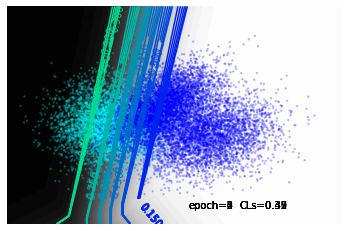

In [ ]:
opt_state = opt_init(nn_params)

itercount = itertools.count()

# train loop
print("\nStarting training...")
for epoch in range(6):
    start_time = time.time()
    for batch_num in range(num_batches):

        opt_state = update(next(itercount), opt_state, test_mu=1.0)

    epoch_time = time.time() - start_time

    params = get_params(opt_state)

    clsval = cls_jax(params, 1.0)
    print(f"Loss {clsval}")
    print(f"Gradient: {jax.grad(cls_jax)(params,1.0)}")

    plot_decision(predict, params)
    plt.scatter(
        train_data[:, 0], train_data[:, 1], c=RGB, alpha=0.2, s=2.2,
    )

    plt.text(5, 0.8, f"epoch={epoch}")

    plt.text(7, 0.8, f"CLs={clsval:.2f}")
    camera.snap()
from IPython.display import HTML

HTML(camera.animate().to_html5_video())

camera.animate().save("animation.gif", writer="imagemagick", fps=4)

# print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))